In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, MSTL, seasonal_decompose
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=13)


In [71]:
df_test = pd.read_csv('data/DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)
df_train = pd.read_csv('data/DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)

df_train.head()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [72]:
df_train.describe()


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [73]:
df_test.describe()


,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


# Check missing values

In [74]:
df_train.isnull().sum()


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [75]:
df_test.isnull().sum()


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# Seasonality analysis

### Mean temperature

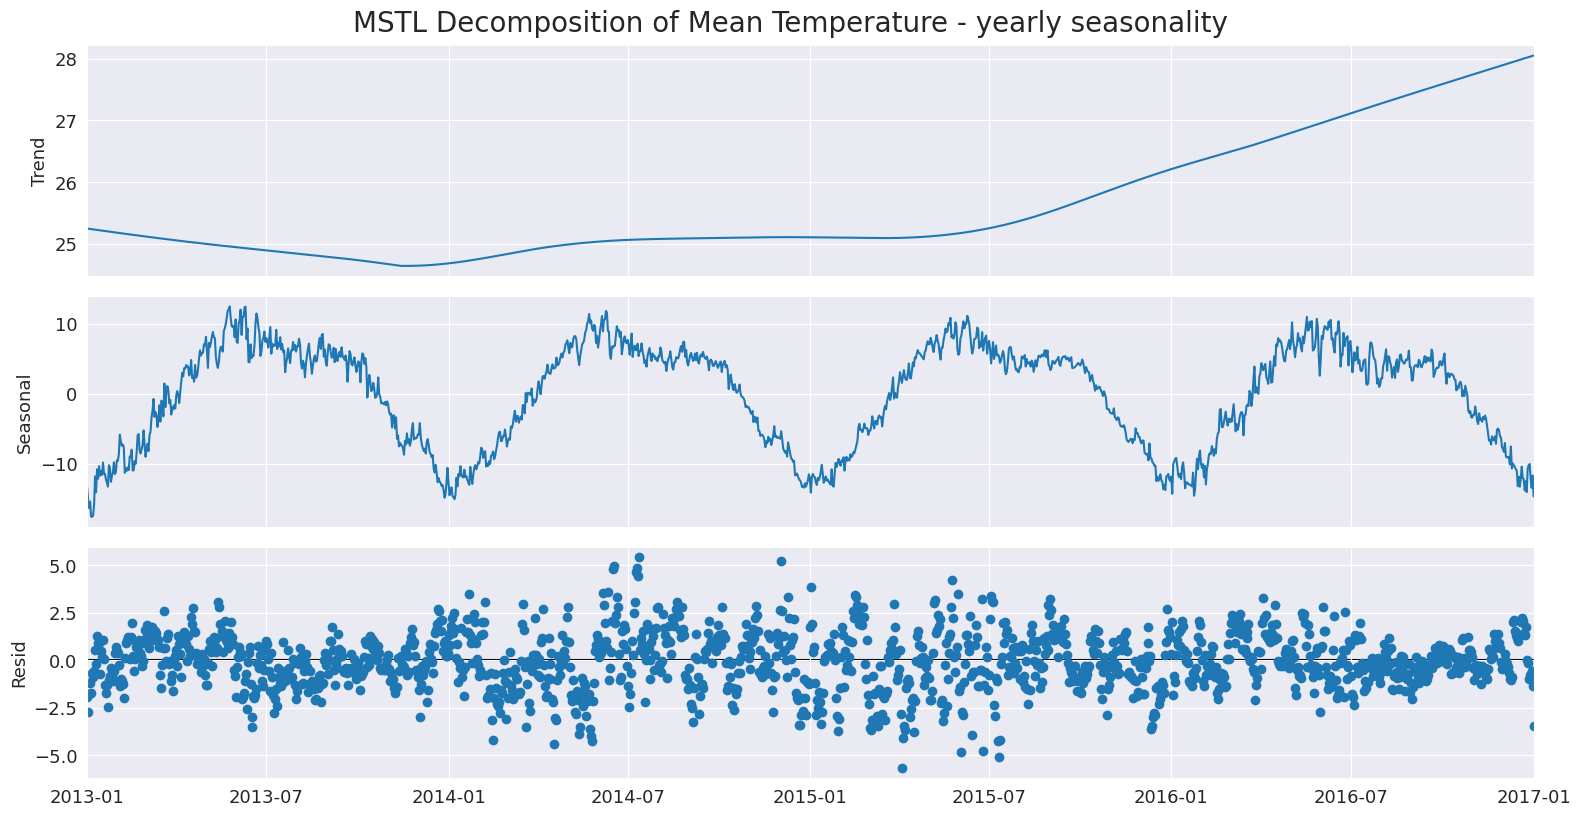

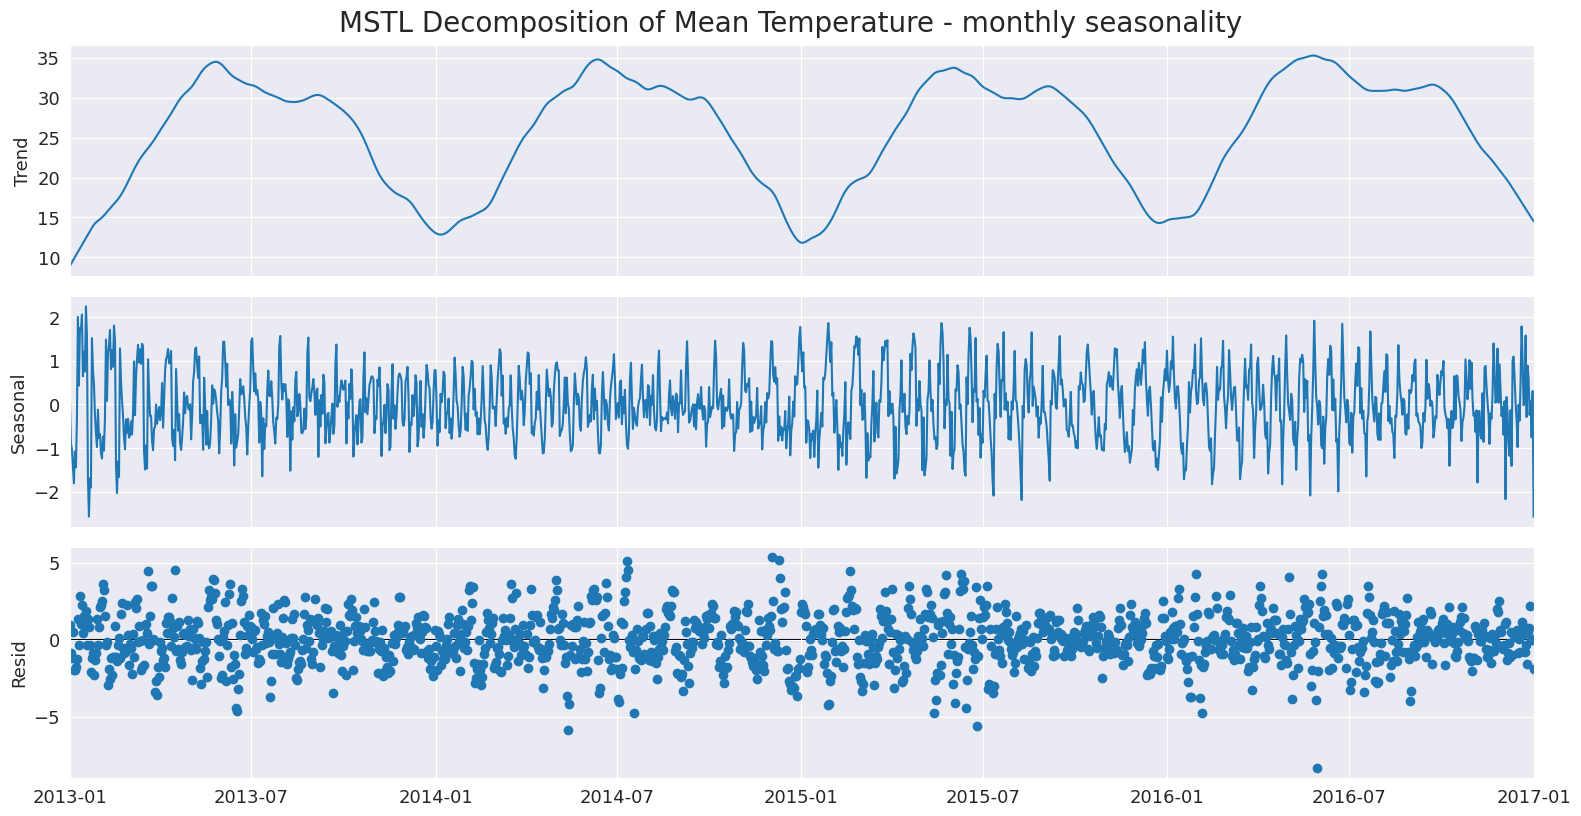

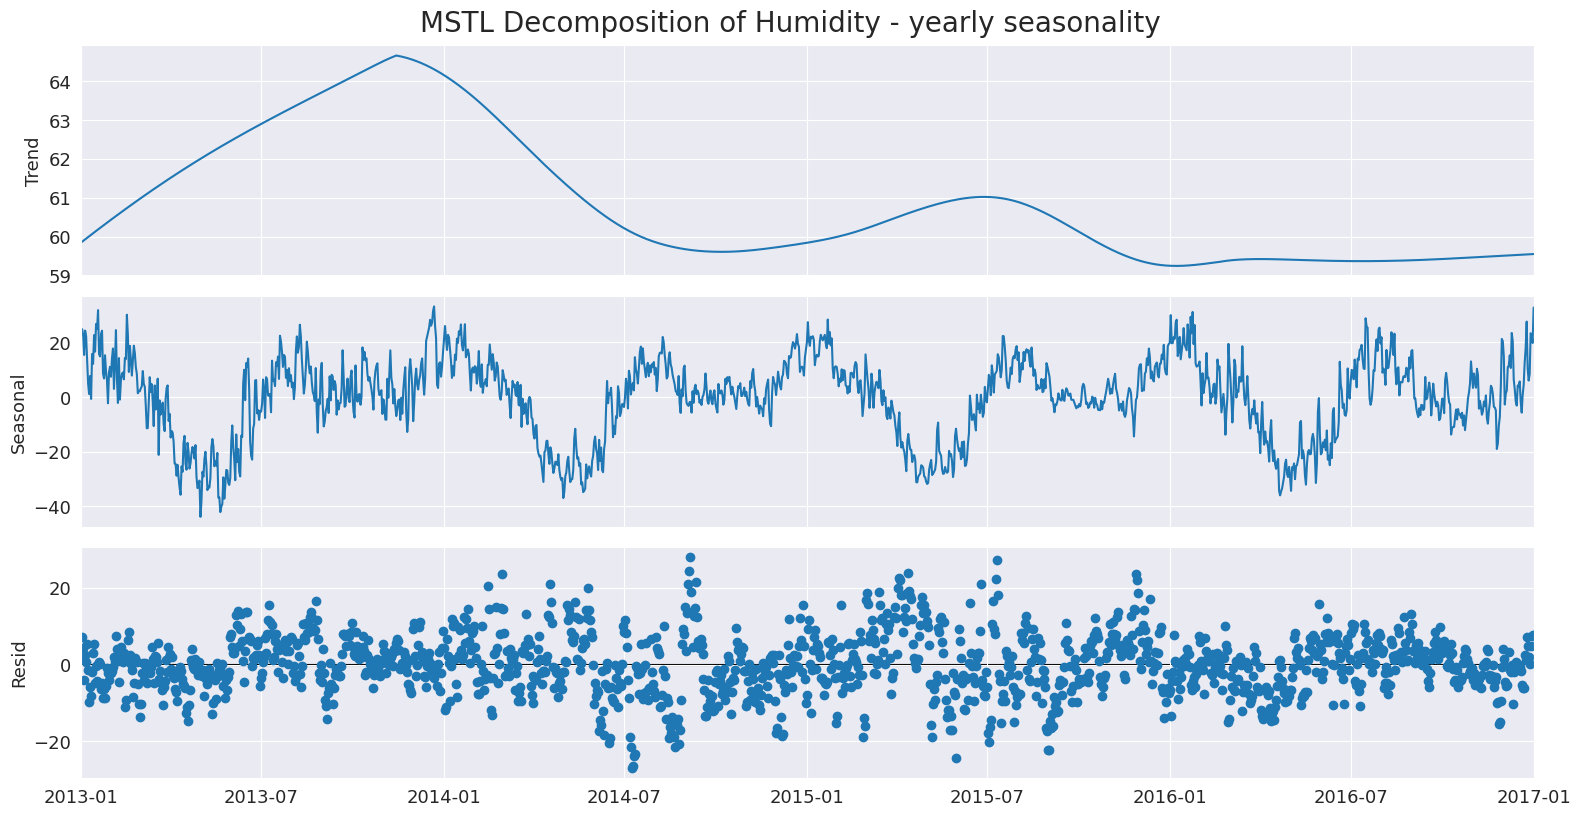

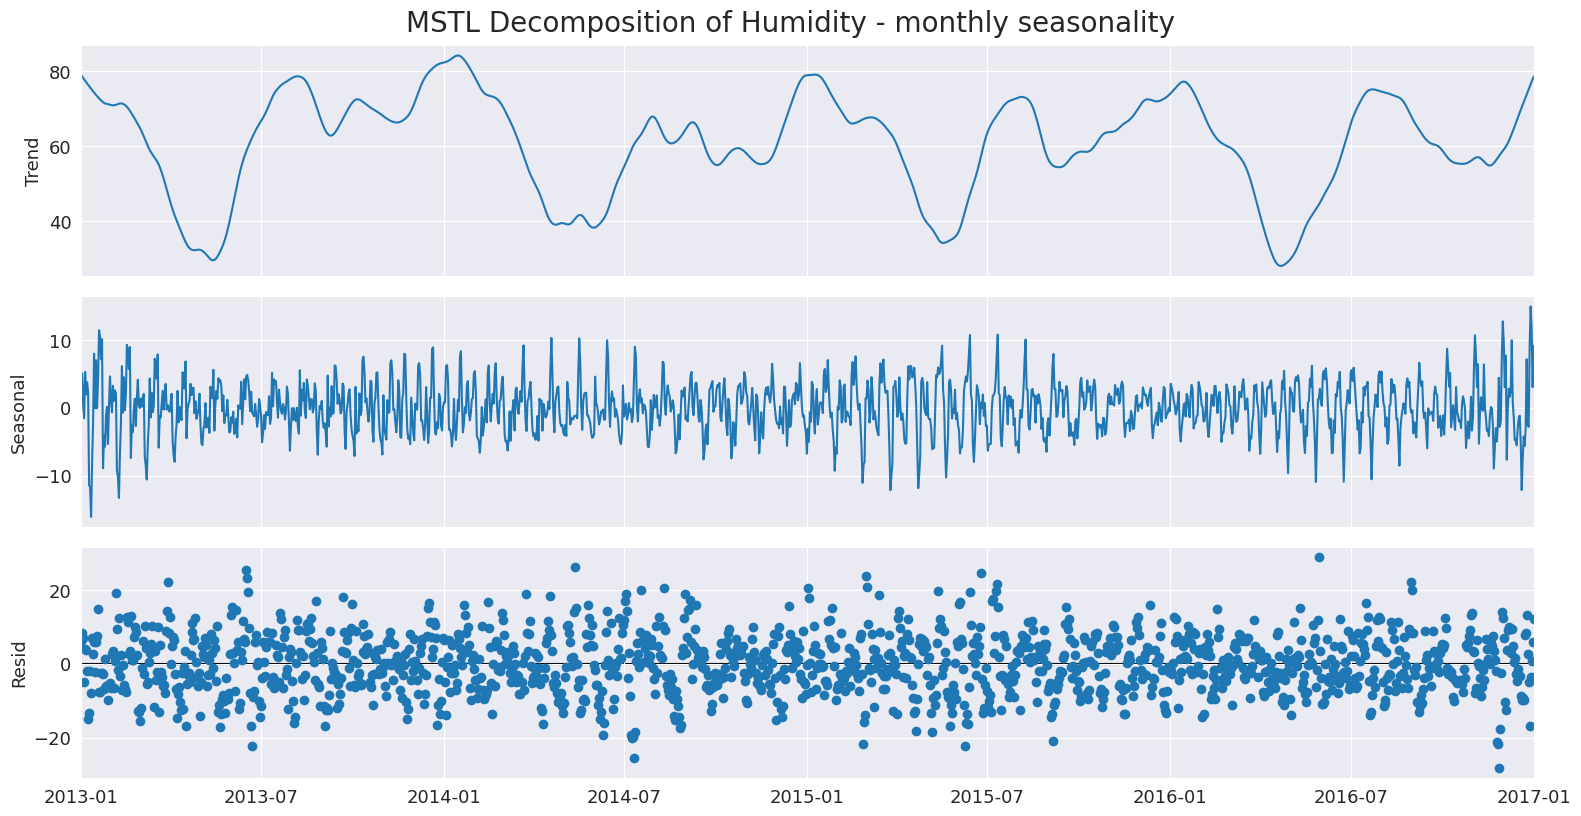

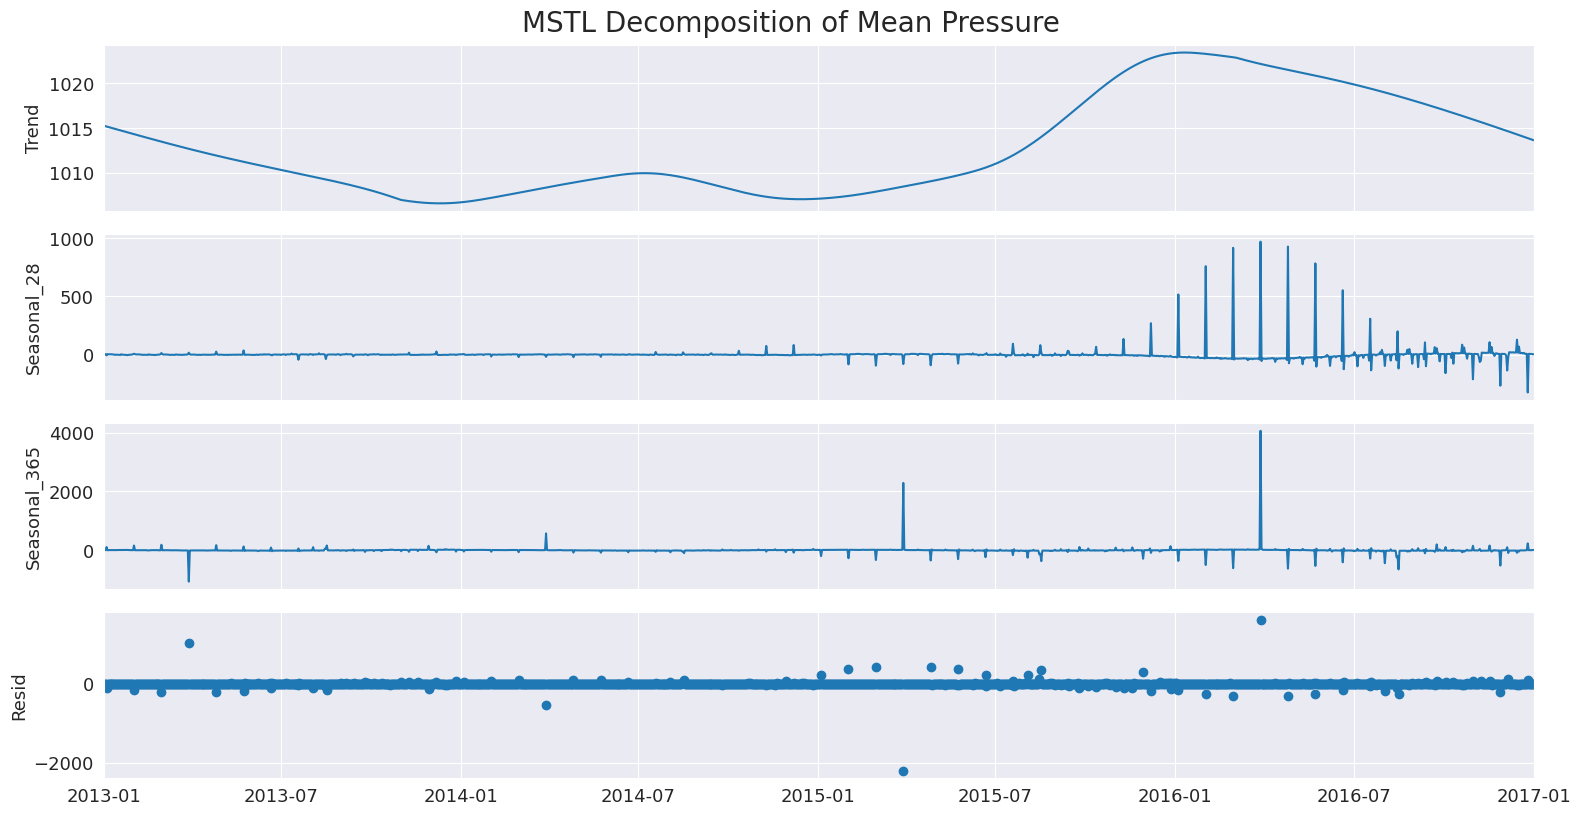

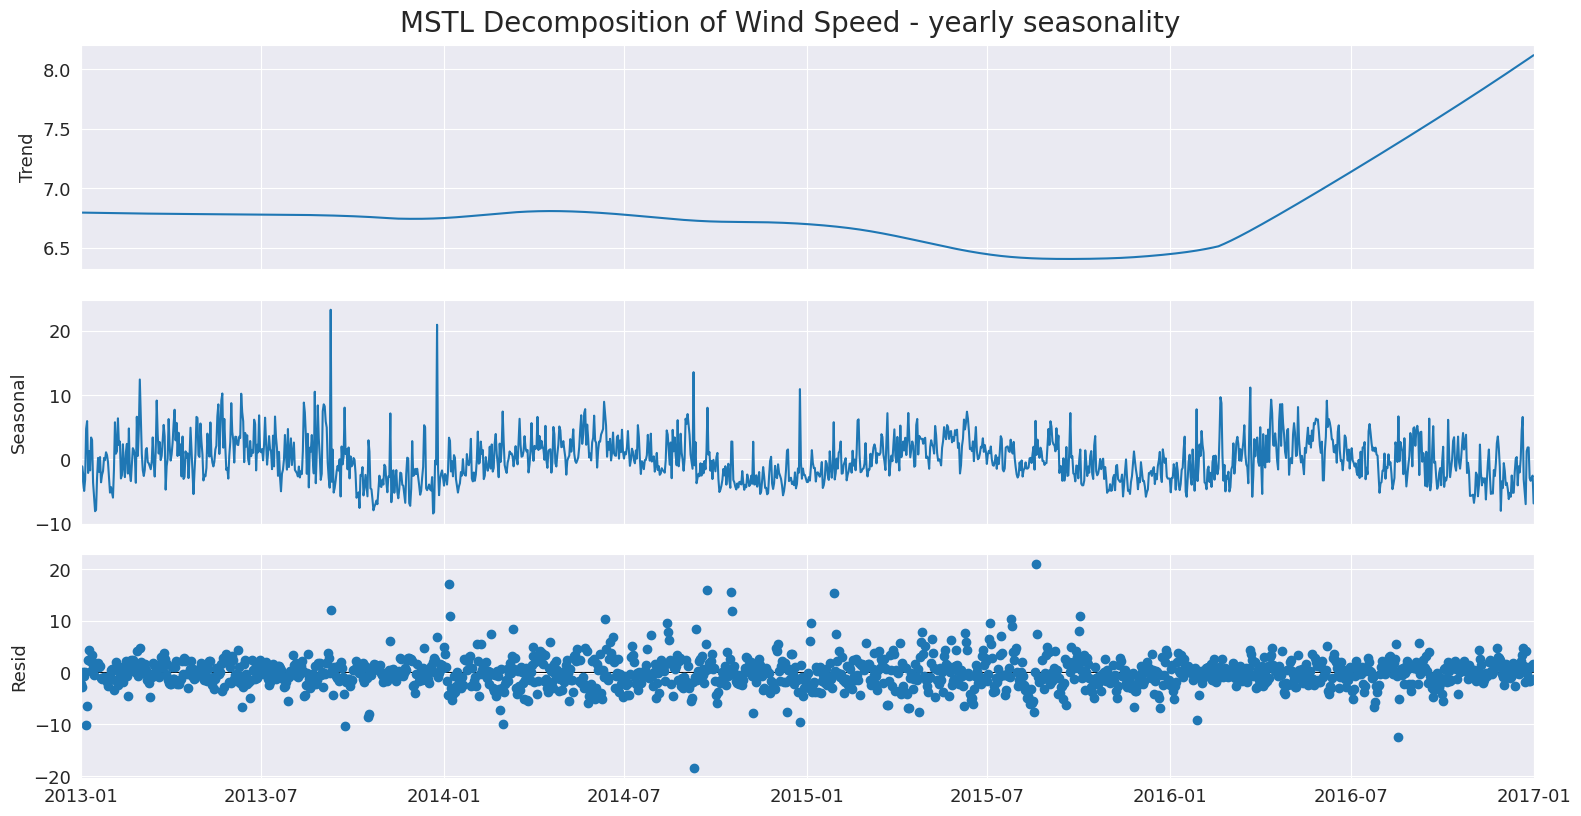

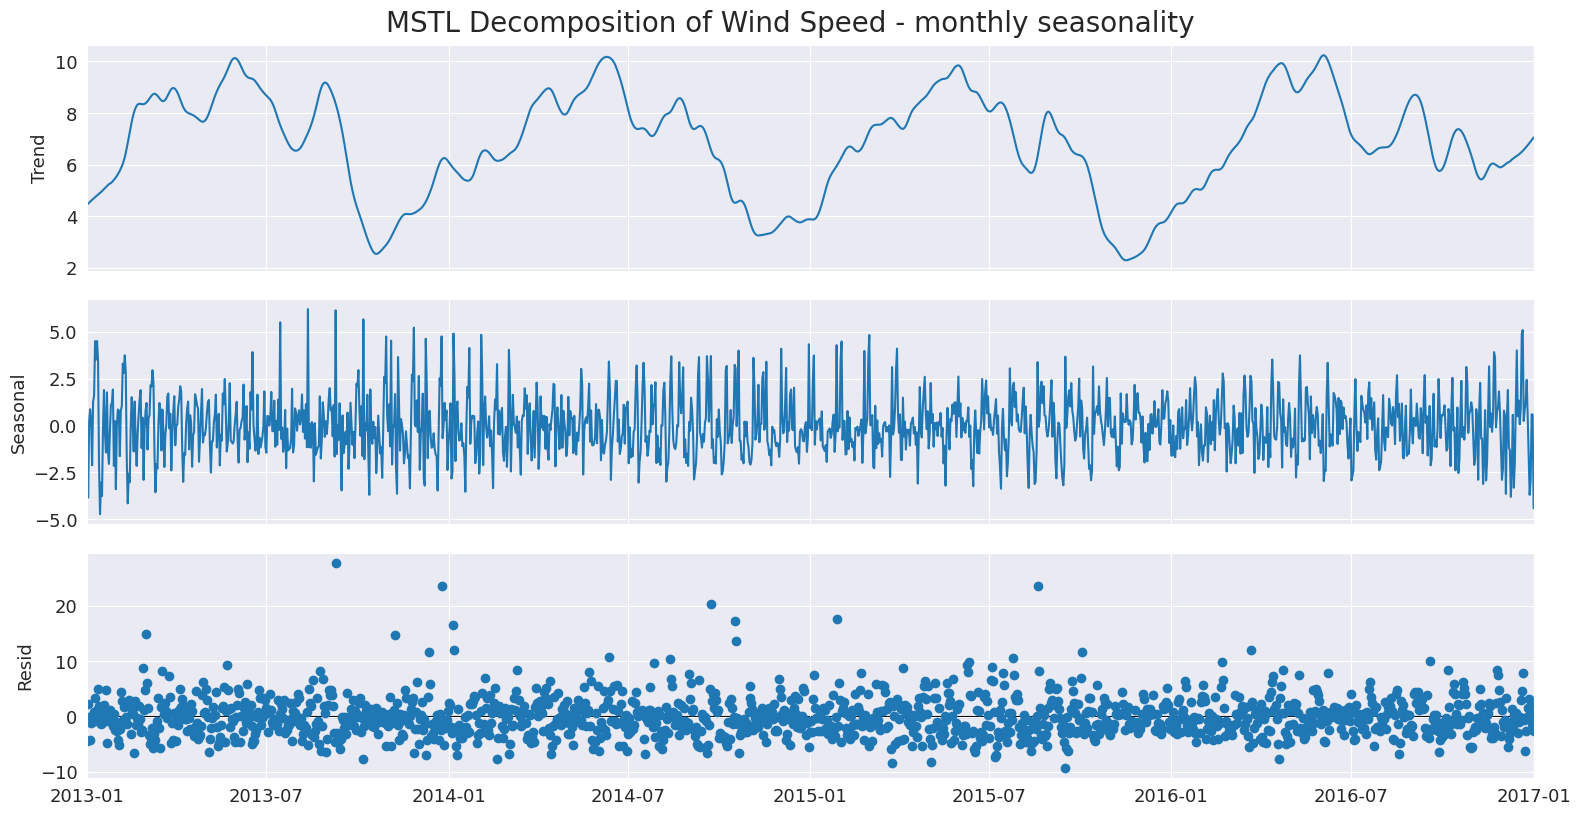

In [76]:
# meantemp
stl = MSTL(df_train['meantemp'], periods=[365])
res = stl.fit()
fig = res.plot(observed=False)
fig.suptitle('MSTL Decomposition of Mean Temperature - yearly seasonality', fontsize=20, y=1.02);

plt.show()
stl = MSTL(df_train['meantemp'], periods=[28])
res = stl.fit()
fig = res.plot(observed=False)
fig.suptitle('MSTL Decomposition of Mean Temperature - monthly seasonality', fontsize=20, y=1.02);
plt.show()

# humidity
stl = MSTL(df_train['humidity'], periods=[365])
res = stl.fit()
fig = res.plot(observed=False)
fig.suptitle('MSTL Decomposition of Humidity - yearly seasonality', fontsize=20, y=1.02);
plt.show()

stl = MSTL(df_train['humidity'], periods=[28])
res = stl.fit()
fig = res.plot(observed=False)
fig.suptitle('MSTL Decomposition of Humidity - monthly seasonality', fontsize=20, y=1.02);
plt.show()

# pressure
stl = MSTL(df_train["meanpressure"], periods=[365,28])
res = stl.fit()
fig = res.plot(observed=False)
fig.suptitle('MSTL Decomposition of Mean Pressure', fontsize=20, y=1.02);
plt.show()

# wind speed
stl = MSTL(df_train["wind_speed"], periods=[365])
res = stl.fit()
fig = res.plot(observed=False)
fig.suptitle('MSTL Decomposition of Wind Speed - yearly seasonality', fontsize=20, y=1.02);
plt.show()

stl = MSTL(df_train["wind_speed"], periods=[28])
res = stl.fit()
fig = res.plot(observed=False)
fig.suptitle('MSTL Decomposition of Wind Speed - monthly seasonality', fontsize=20, y=1.02);
plt.show()


